<a href="https://www.kaggle.com/code/roshan26/linear-regression-with-assumptions?scriptVersionId=106967167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries: <br>
Here we are importing all the libraries that we are going to use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

import warnings
warnings.filterwarnings('ignore')

---

## Importing Dataset: <br>
Importing the insurance dataset.

In [2]:
df = pd.read_csv('../input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


---

## Missing values check: <br>
Checking for missing values.

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**There are no missing values in our dataset.**

---

## Feature Engineering: <br>
In this section we will Encode our data.

In [5]:
df['smoker'].replace({'yes':0,'no':1},inplace=True)

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,southwest,16884.92400
1,18,male,33.770,1,1,southeast,1725.55230
2,28,male,33.000,3,1,southeast,4449.46200
3,33,male,22.705,0,1,northwest,21984.47061
4,32,male,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,1,northwest,10600.54830
1334,18,female,31.920,0,1,northeast,2205.98080
1335,18,female,36.850,0,1,southeast,1629.83350
1336,21,female,25.800,0,1,southwest,2007.94500


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,southwest,16884.92400
1,18,male,33.770,1,1,southeast,1725.55230
2,28,male,33.000,3,1,southeast,4449.46200
3,33,male,22.705,0,1,northwest,21984.47061
4,32,male,28.880,0,1,northwest,3866.85520


**OneHotEncoding:**
1. Here we are Encoding the categorical variables: **sex** & **region**.
2. One major mistake to avoid while OneHotEncoding is that we should not use fit_transform on our data. The correct method invloves: **fit**, **save the model** & **transform**.
3. In OneHotEncoding we should drop the one of the dummy variables for each categories to avoid Dummy Variable Trap.

In [8]:
nominal_vars = ['sex','region']
from sklearn.preprocessing import OneHotEncoder
oneh = OneHotEncoder(handle_unknown='error',sparse=False,drop='first')
oneh.fit(df[nominal_vars])

OneHotEncoder(drop='first', sparse=False)

In [9]:
from joblib import dump, load
dump(oneh, './LR_OneHOt.joblib') # save the model

['./LR_OneHOt.joblib']

In [10]:
oneh = load('./LR_OneHOt.joblib')
oh_df = pd.DataFrame(oneh.transform(df[nominal_vars]),columns=oneh.get_feature_names(nominal_vars))
df = pd.concat([df,oh_df],axis=1)

In [11]:
df.drop(columns=nominal_vars,inplace=True)

In [12]:
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,16884.92400,0.0,0.0,0.0,1.0
1,18,33.770,1,1,1725.55230,1.0,0.0,1.0,0.0
2,28,33.000,3,1,4449.46200,1.0,0.0,1.0,0.0
3,33,22.705,0,1,21984.47061,1.0,1.0,0.0,0.0
4,32,28.880,0,1,3866.85520,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,1.0,1.0,0.0,0.0
1334,18,31.920,0,1,2205.98080,0.0,0.0,0.0,0.0
1335,18,36.850,0,1,1629.83350,0.0,0.0,1.0,0.0
1336,21,25.800,0,1,2007.94500,0.0,0.0,0.0,1.0


**We have encoded *smoker*, *sex* & *region* variables.**

### Standardization:
1. Since we are using Linear Regression Model, we also check whether the data satisfies its assumptions.
2. Before assumptions we apply feature scalling.

In [13]:
cont_cols = ['age','bmi']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df[cont_cols])
dump(sc, './LR_Standardsc.joblib') # save the model
sc = load('./LR_Standardsc.joblib')
sc_df = pd.DataFrame(sc.transform(df[cont_cols]),columns=cont_cols)
df = pd.concat([df.drop(columns=cont_cols),sc_df],axis=1)

In [14]:
df

,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest,age,bmi
0,0,0,16884.92400,0.0,0.0,0.0,1.0,-1.438764,-0.453320
1,1,1,1725.55230,1.0,0.0,1.0,0.0,-1.509965,0.509621
2,3,1,4449.46200,1.0,0.0,1.0,0.0,-0.797954,0.383307
3,0,1,21984.47061,1.0,1.0,0.0,0.0,-0.441948,-1.305531
4,0,1,3866.85520,1.0,1.0,0.0,0.0,-0.513149,-0.292556
...,...,...,...,...,...,...,...,...,...
1333,3,1,10600.54830,1.0,1.0,0.0,0.0,0.768473,0.050297
1334,0,1,2205.98080,0.0,0.0,0.0,0.0,-1.509965,0.206139
1335,0,1,1629.83350,0.0,0.0,1.0,0.0,-1.509965,1.014878
1336,0,1,2007.94500,0.0,0.0,0.0,1.0,-1.296362,-0.797813


**We have used StandardScaler to scale *age* and *bmi* variables**

---

## Multicollinearity: <br>

1. Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.
2. To measure multicollinearity among the independent features, we use VIF (Variance Inflation Factor).

In [15]:
X = df.drop(columns=['charges'])
Y = df['charges']

In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data.sort_values(by='VIF',ascending=False))

            feature       VIF
1            smoker  2.881257
2          sex_male  1.772700
4  region_southeast  1.716610
0          children  1.695564
5  region_southwest  1.639750
3  region_northwest  1.639666
7               bmi  1.093712
6               age  1.016790


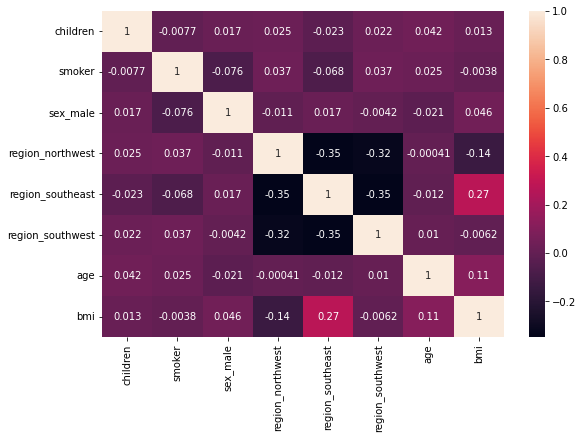

In [17]:
plt.figure(figsize=(9,6))
sns.heatmap(X.corr(),annot=True)
plt.show()

**There is no multicollinearity present in our dataset.**

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)
Y_pred = lr_model.predict(X_test)
residuals = Y_test - Y_pred

### Autocorrelation : Assumption of Independent Errors: <br>

1. Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
2. Autocorrelation measures the relationship between a variable's current value and its past values.
3. We use Durbin Watson test to measure the degree of autocorrelation.
4. The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:
    - 2 is no autocorrelation.
    - Less than 2 is positive autocorrelation (common in time series data).
    - Greater than 2 is negative autocorrelation (less common in time series data).
5. A residual vs fitted plot can also be used to assess the autocorrelation in the data.

In [20]:
statsmodels.stats.stattools.durbin_watson(residuals)

2.190540770682535

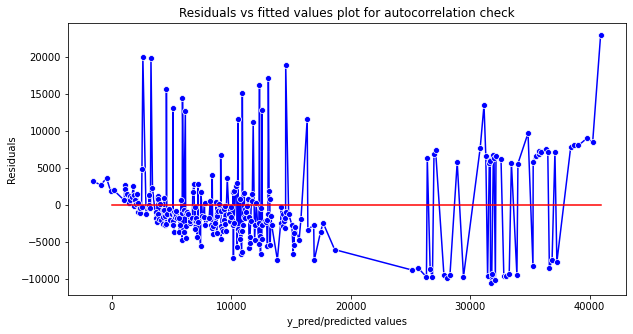

In [21]:
plt.figure(figsize=(10,5))
p = sns.lineplot(Y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,max(Y_pred)],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

**There is no autocorrelation in our dataset.**

### Assumption of Normality of the Residuals:
1. Normality is the assumption that the underlying residuals are normally distributed, or approximately so.
2. We can use a Q-Q Plot to see whether our data is normally distributed.

#### Q-Q Plot

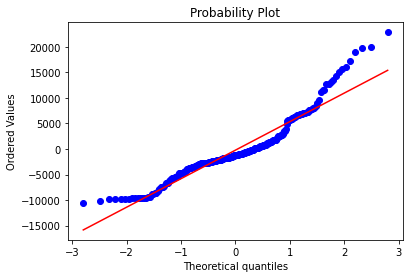

In [22]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

**The residuals are approximately normally distributed.**

### Assumption of Homoscedasticity:
1. Heteroskedasticity refers to situations where the variance of the residuals is unequal over a range of measured values.
2. When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals.
3. A residual vs fitted plot can be used to assess whether data is homoscedatic in nature or not.
4. Goldfeld-Quandt Test can also be used to assess the same.

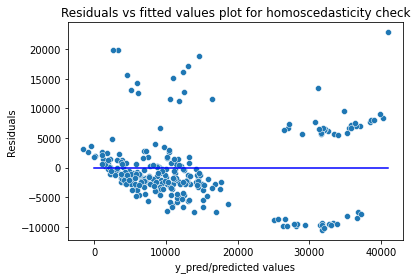

In [23]:
p = sns.scatterplot(Y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,max(Y_pred)],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### **Goldfeld Quandt Test**

**Null Hypothesis**: Error terms are homoscedastic <br>
**Alternative Hypothesis**: Error terms are heteroscedastic. <br>

In [24]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.0908981471877113), ('p-value', 0.3130408322770701)]

**Errors are homoscedastic in nature.**

---

## Model evaluation

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Adj_r2 = 1 - (1-r2_score(Y_test, Y_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print("R Squared:",r2_score(Y_test, Y_pred))
print("MSE:",mean_squared_error(Y_test, Y_pred))
print("MAE:",mean_absolute_error(Y_test, Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Adjusted R Squared:",Adj_r2)


R Squared: 0.7835929767120722
MSE: 33596915.851361476
MAE: 4181.1944737536505
RMSE: 5796.284659276274
Adjusted R Squared: 0.782290300875877


---

## Equation for the best-fit line:

In [26]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:.2f}'.format})


In [27]:
equation = "Charges = "
equation += str(np.round(lr_model.intercept_,2))
equation

'Charges = 32131.57'

In [28]:
for i in range(0,len(X.columns)):
    if list(lr_model.coef_)[i]>0:
        equation += ' + '
        equation += (str(np.round(list(lr_model.coef_),2)[i])+'*'+ str(list(X.columns)[i]))
    else:
        equation += ' '+(str(np.round(list(lr_model.coef_),2)[i])+'*'+ str(list(X.columns)[i]))

In [29]:
equation

'Charges = 32131.57 + 425.28*children -23651.13*smoker -18.59*sex_male -370.68*region_northwest -657.86*region_southeast -809.8*region_southwest + 3609.15*age + 2054.89*bmi'